In [1]:
%load_ext autoreload
%autoreload 2

from nnfabrik.builder import get_model, get_trainer, get_data
import torch
import matplotlib.pyplot as plt

import numpy as np

In [2]:
dataset_fn, dataset_config = ('nnvision.datasets.monkey_loaders.monkey_static_loader_combined',
 {'dataset': 'CSRF19_V4',
  'neuronal_data_files': ['/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3653578665399.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3646222772876.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3748957662107.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3649689088057.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3712670505092.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3748441462696.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3747833727628.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3691077636469.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3652885366025.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3746022907126.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3647617982355.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3708093025461.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3722525435528.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3746535952129.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3650459721914.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3719936747145.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3693408913501.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3744900291863.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3713540419547.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3654087847388.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3733498089386.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3751467146461.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3692979440036.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3690904445724.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3648051669051.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3746107242231.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3646401671909.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3732201680940.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3749822834981.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3748614014391.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3691598527367.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3692111199445.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3744986196793.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3651417046988.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3653320713405.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3750340866612.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3709044427797.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3692803081128.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3708524807328.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3649169411059.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3712929593724.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3649252123347.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3722438565710.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3712241082384.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3751642598412.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3653924870701.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3646321567215.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3707919779504.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3750425748967.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3753367464516.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3731428171903.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3713453620500.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3653226873615.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3650037309346.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3712155848180.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3646747773987.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3713364469057.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3750168022112.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3652197206019.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3654009687031.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3753282720176.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3751986795662.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3733411059011.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3732890821596.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3732284443391.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3691166189967.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3720103503530.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3712846676126.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3692198281175.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3647439534447.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3732028703805.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3748527198188.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3747317696750.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3692716394548.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3751034032929.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3731593515335.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3649771255234.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3646924284383.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3751555475499.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3747921558292.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3648475457626.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3746626147103.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3732808128055.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3751380721375.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3646657276979.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3705414317880.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3653061170515.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3690561673793.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3645713184967.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3732717352922.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3647531807425.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3648221742562.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3690990614288.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_4722438565710.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3708698030781.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3731509601777.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3714143368022.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3648644839726.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3646146362280.pickle',
   '/data/monkey/toliaslab/CSRF19_V4/neuronal_data/CSRF19_V4_3750947602251.pickle'],
  'image_cache_path': '/data/monkey/toliaslab/CSRF19_V4/images/',
  'crop': [[18, 18], [110, 110]],
  'subsample': 1,
  'scale': 0.5,
  'seed': 1000,
  'time_bins_sum': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
  'batch_size': 64,
  'include_prev_image': False,
  'include_trial_id': False,
  'img_mean': 124.34,
  'img_std': 70.28})

model_fn, model_config = ('nnvision.models.ptrmodels.task_core_gauss_readout',
 {'input_channels': 1,
  'model_name': 'resnet50_l2_eps0_1',
  'layer_name': 'layer3.0',
  'pretrained': False,
  'bias': False,
  'final_batchnorm': True,
  'final_nonlinearity': True,
  'momentum': 0.1,
  'fine_tune': True,
  'init_mu_range': 0.4,
  'init_sigma_range': 0.6,
  'readout_bias': True,
  'gamma_readout': 3.0,
  'gauss_type': 'isotropic',
  'elu_offset': -1,
  'data_info': None})

trainer_fn, trainer_config = ('nnvision.training.trainers.nnvision_trainer',
 {'stop_function': 'get_poisson_loss',
  'maximize': False,
  'avg_loss': False,
  'device': 'cuda',
  'max_iter': 200, # 200
  'lr_init': 3 * 10e-4,
  'lr_decay_steps': 5,
  'patience': 5,
  'verbose': True,
  'adamw': True,
  'return_test_score': True
 })

In [3]:
dataloaders = get_data(dataset_fn, dataset_config)

Files Processing: 100% 100/100 [00:24<00:00,  4.06it/s]
/usr/local/lib/python3.9/dist-packages/skimage/_shared/utils.py:338: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0.Please use `channel_axis` instead.
  return func(*args, **kwargs)


In [4]:
next(iter(dataloaders['train']['all_sessions'])).inputs.shape

torch.Size([64, 1, 100, 100])

## Task Driven | Gaussian

In [5]:
model_fn = 'nnvision.models.ptrmodels.task_core_gauss_readout'
model_config =  {
  'input_channels': 1,
  'model_name': 'resnet50_l2_eps0_1',
  'layer_name': 'layer3.0',
  'pretrained': True,
  'bias': False,
  'final_batchnorm': True,
  'final_nonlinearity': True,
  'momentum': 0.1,
  'fine_tune': False,
  'init_mu_range': 0.4,
  'init_sigma_range': 0.6,
  'readout_bias': True,
  'gamma_readout': 3.0,
  'gauss_type': 'isotropic',
  'elu_offset': -1,
}

trainer = get_trainer(trainer_fn, trainer_config)

model = get_model(model_fn, model_config, dataloaders=dataloaders, seed=0)
model.cuda().train();

test_correlation, output, state_dict = trainer(model, dataloaders, seed=42)

test_correlation

Please enter DataJoint username:  
Please enter DataJoint password:  


Connecting @localhost:3306
datajoint connection not established, skipping model imports from nnfabrik tables


/usr/local/lib/python3.9/dist-packages/skimage/_shared/utils.py:338: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0.Please use `channel_axis` instead.
  return func(*args, **kwargs)
Downloading: "https://huggingface.co/madrylab/robust-imagenet-models/resolve/main/resnet50_l2_eps0.1.ckpt" to /root/.cache/torch/hub/checkpoints/resnet50_l2_eps0.1.ckpt


  0%|          | 0.00/195M [00:00<?, ?B/s]

/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Epoch 1: 100% 300/300 [00:35<00:00,  8.56it/s]


[001|00/05] ---> 0.15104499006686692


Epoch 2: 100% 300/300 [00:10<00:00, 29.86it/s]


[002|00/05] ---> 0.13309882783463006


Epoch 3: 100% 300/300 [00:09<00:00, 30.07it/s]


[003|00/05] ---> 0.12469394215905814


Epoch 4: 100% 300/300 [00:10<00:00, 29.97it/s]


[004|00/05] ---> 0.1196878597234991


Epoch 5: 100% 300/300 [00:09<00:00, 30.27it/s]


[005|00/05] ---> 0.11779722211559619


Epoch 6: 100% 300/300 [00:10<00:00, 29.77it/s]


[006|00/05] ---> 0.11578661609581571


Epoch 7: 100% 300/300 [00:09<00:00, 30.18it/s]


[007|00/05] ---> 0.11467382375658604


Epoch 8: 100% 300/300 [00:10<00:00, 29.71it/s]


[008|00/05] ---> 0.11301102755926232


Epoch 9: 100% 300/300 [00:09<00:00, 30.36it/s]


[009|00/05] ---> 0.11296075598240607


Epoch 10: 100% 300/300 [00:10<00:00, 29.96it/s]


[010|00/05] ---> 0.11264314065018867


Epoch 11: 100% 300/300 [00:10<00:00, 29.71it/s]


[011|00/05] ---> 0.11252813771855338


Epoch 12: 100% 300/300 [00:09<00:00, 30.18it/s]


[012|00/05] ---> 0.11218220075428122


Epoch 13: 100% 300/300 [00:10<00:00, 29.63it/s]


[013|00/05] ---> 0.11193863308037455


Epoch 14: 100% 300/300 [00:09<00:00, 30.35it/s]


[014|01/05] -/-> 0.11202226055455701


Epoch 15: 100% 300/300 [00:09<00:00, 30.15it/s]


[015|01/05] ---> 0.11148876994036537


Epoch 16: 100% 300/300 [00:10<00:00, 29.47it/s]


[016|01/05] -/-> 0.11179924713146644


Epoch 17: 100% 300/300 [00:09<00:00, 30.32it/s]


[017|01/05] ---> 0.11139622081364998


Epoch 18: 100% 300/300 [00:10<00:00, 29.57it/s]


[018|00/05] ---> 0.11075160180847596


Epoch 19: 100% 300/300 [00:10<00:00, 29.63it/s]


[019|01/05] -/-> 0.11099600286248415


Epoch 20: 100% 300/300 [00:10<00:00, 29.89it/s]


[020|02/05] -/-> 0.11131223125319104


Epoch 21: 100% 300/300 [00:10<00:00, 29.42it/s]


[021|03/05] -/-> 0.11130590441753699


Epoch 22: 100% 300/300 [00:09<00:00, 30.80it/s]


[022|04/05] -/-> 0.11099862891236818


Epoch 23: 100% 300/300 [00:10<00:00, 29.99it/s]


[023|05/05] -/-> 0.11082339399030677
Restoring best model after lr decay! 0.110823 ---> 0.110752


Epoch 24: 100% 300/300 [00:09<00:00, 30.09it/s]


Epoch    24: reducing learning rate of group 0 to 9.0000e-04.
[024|01/05] -/-> 0.11134545900549261


Epoch 25: 100% 300/300 [00:10<00:00, 29.92it/s]


[025|01/05] ---> 0.10609010218975466


Epoch 26: 100% 300/300 [00:10<00:00, 29.83it/s]


[026|01/05] -/-> 0.10613311500283915


Epoch 27: 100% 300/300 [00:09<00:00, 30.26it/s]


[027|02/05] -/-> 0.10628709579011217


Epoch 28: 100% 300/300 [00:10<00:00, 29.88it/s]


[028|03/05] -/-> 0.10628660730697957


Epoch 29: 100% 300/300 [00:09<00:00, 30.58it/s]


[029|04/05] -/-> 0.10614178046860633


Epoch 30: 100% 300/300 [00:09<00:00, 30.87it/s]


[030|04/05] ---> 0.10606351736512573


Epoch 31: 100% 300/300 [00:09<00:00, 30.70it/s]


[031|01/05] -/-> 0.10622800673544197


Epoch 32: 100% 300/300 [00:09<00:00, 30.11it/s]


[032|02/05] -/-> 0.10635223686244762


Epoch 33: 100% 300/300 [00:09<00:00, 30.63it/s]


[033|02/05] ---> 0.10599710063805273


Epoch 34: 100% 300/300 [00:10<00:00, 29.43it/s]


[034|00/05] ---> 0.10596911005012721


Epoch 35: 100% 300/300 [00:09<00:00, 30.40it/s]


[035|00/05] ---> 0.10594523858629991


Epoch 36: 100% 300/300 [00:10<00:00, 29.53it/s]


[036|01/05] -/-> 0.10609111631193839


Epoch 37: 100% 300/300 [00:09<00:00, 30.58it/s]


[037|01/05] ---> 0.10577694420823386


Epoch 38: 100% 300/300 [00:10<00:00, 29.74it/s]


[038|01/05] -/-> 0.10613522427117306


Epoch 39: 100% 300/300 [00:09<00:00, 30.14it/s]


[039|02/05] -/-> 0.10579087512122894


Epoch 40: 100% 300/300 [00:09<00:00, 30.30it/s]


[040|03/05] -/-> 0.1060934701732355


Epoch 41: 100% 300/300 [00:09<00:00, 30.19it/s]


[041|04/05] -/-> 0.10615988455704366


Epoch 42: 100% 300/300 [00:09<00:00, 30.11it/s]


[042|05/05] -/-> 0.10610178827982486
Restoring best model after lr decay! 0.106102 ---> 0.105777


Epoch 43: 100% 300/300 [00:10<00:00, 29.61it/s]


Epoch    43: reducing learning rate of group 0 to 2.7000e-04.
[043|01/05] -/-> 0.1060623631115314


Epoch 44: 100% 300/300 [00:09<00:00, 30.48it/s]


[044|01/05] ---> 0.10382669975903093


Epoch 45: 100% 300/300 [00:10<00:00, 29.77it/s]


[045|01/05] -/-> 0.1038453130797352


Epoch 46: 100% 300/300 [00:10<00:00, 29.92it/s]


[046|02/05] -/-> 0.10392677085874896


Epoch 47: 100% 300/300 [00:10<00:00, 29.73it/s]


[047|03/05] -/-> 0.10388989511740819


Epoch 48: 100% 300/300 [00:09<00:00, 30.06it/s]


[048|04/05] -/-> 0.10394638534733563


Epoch 49: 100% 300/300 [00:09<00:00, 30.61it/s]


[049|05/05] -/-> 0.10397980786918298
Restoring best model after lr decay! 0.103980 ---> 0.103827


Epoch 50: 100% 300/300 [00:09<00:00, 30.22it/s]


[050|00/05] ---> 0.10375582292144885


Epoch 51: 100% 300/300 [00:09<00:00, 30.27it/s]


[051|01/05] -/-> 0.10377756142561152


Epoch 52: 100% 300/300 [00:09<00:00, 30.31it/s]


[052|02/05] -/-> 0.10381885990638003


Epoch 53: 100% 300/300 [00:09<00:00, 30.32it/s]


[053|03/05] -/-> 0.1039256869123654


Epoch 54: 100% 300/300 [00:09<00:00, 30.75it/s]


[054|04/05] -/-> 0.10383480507747103


Epoch 55: 100% 300/300 [00:09<00:00, 30.35it/s]


[055|05/05] -/-> 0.10394030068660709
Restoring best model after lr decay! 0.103940 ---> 0.103756


Epoch 56: 100% 300/300 [00:09<00:00, 30.39it/s]


Epoch    56: reducing learning rate of group 0 to 1.0000e-04.
[056|01/05] -/-> 0.10380985282412433


Epoch 57: 100% 300/300 [00:09<00:00, 30.67it/s]


[057|01/05] ---> 0.10351991914648512


Epoch 58: 100% 300/300 [00:09<00:00, 30.09it/s]


[058|00/05] ---> 0.10347477289131937


Epoch 59: 100% 300/300 [00:10<00:00, 29.91it/s]


[059|01/05] -/-> 0.10354755032157395


Epoch 60: 100% 300/300 [00:10<00:00, 29.91it/s]


[060|02/05] -/-> 0.10363064212515323


Epoch 61: 100% 300/300 [00:09<00:00, 30.58it/s]


[061|02/05] ---> 0.1034222562073916


Epoch 62: 100% 300/300 [00:09<00:00, 30.36it/s]


[062|01/05] -/-> 0.10346952026835704


Epoch 63: 100% 300/300 [00:10<00:00, 29.41it/s]


[063|02/05] -/-> 0.1034493737765342


Epoch 64: 100% 300/300 [00:10<00:00, 29.62it/s]


[064|03/05] -/-> 0.10350339328367886


Epoch 65: 100% 300/300 [00:10<00:00, 29.89it/s]


[065|04/05] -/-> 0.10343287122042455


Epoch 66: 100% 300/300 [00:10<00:00, 29.91it/s]


[066|05/05] -/-> 0.10369751842536802
Restoring best model after lr decay! 0.103698 ---> 0.103422
Restoring best model! 0.103422 ---> 0.103422


0.2619708596289779

In [ ]:
model_fn = 'nnvision.models.ptrmodels.task_core_gauss_readout'
model_config =  {
  'input_channels': 1,
  'model_name': 'resnet50_l2_eps0_1',
  'layer_name': 'layer3.0',
  'pretrained': False,
  'bias': False,
  'final_batchnorm': True,
  'final_nonlinearity': True,
  'momentum': 0.1,
  'fine_tune': True,
  'init_mu_range': 0.4,
  'init_sigma_range': 0.6,
  'readout_bias': True,
  'gamma_readout': 3.0,
  'gauss_type': 'isotropic',
  'elu_offset': -1,
}

trainer = get_trainer(trainer_fn, trainer_config)

model = get_model(model_fn, model_config, dataloaders=dataloaders, seed=0)
model.cuda().train();

test_correlation, output, state_dict = trainer(model, dataloaders, seed=42)

test_correlation

## Task Driven | Attention

In [ ]:
model_fn = 'nnvision.models.ptrmodels.custom_task_core_multihead_attention'
model_config =  {
    'input_channels': 1,
    'model_name': 'resnet50_l2_eps0_1',
    'layer_name': 'layer3.0',
    'pretrained': True,
    'bias': False,
    'final_batchnorm': True,
    'final_nonlinearity': True,
    'momentum': 0.1,
    'fine_tune': False,
    'readout_bias': True,

    "use_pos_enc": True,
    "dropout_pos": 0.1,
    "final_nonlinearity": True,
    "key_embedding": True,
    "value_embedding": True,
    "layer_norm": False,
    "scale": True,
    "learned_pos": False,
    "gamma_query": 1,
    "gamma_features": 1,
    "heads": 1,
    "temperature": [True, 1],
}

trainer = get_trainer(trainer_fn, trainer_config)

model = get_model(model_fn, model_config, dataloaders=dataloaders, seed=0)
model.cuda().train();

test_correlation, output, state_dict = trainer(model, dataloaders, seed=42)

test_correlation

Epoch 1: 100% 300/300 [00:14<00:00, 20.74it/s]


[001|00/05] ---> 0.14363622820878727


Epoch 2: 100% 300/300 [00:14<00:00, 21.19it/s]


[002|00/05] ---> 0.1356117892064256


Epoch 3: 100% 300/300 [00:14<00:00, 20.91it/s]


[003|00/05] ---> 0.1331110525833153


Epoch 4: 100% 300/300 [00:14<00:00, 20.87it/s]


[004|00/05] ---> 0.13282878466467907


Epoch 5: 100% 300/300 [00:14<00:00, 20.99it/s]


In [7]:
test_correlation

0.2759113943899222

## Data Driven | Attention

In [ ]:
model_fn = "nnvision.models.models.se_core_shared_multihead_attention"
model_config = {
    "pad_input": False,
    "gamma_input": 10,
    "layers": 5,
    "depth_separable": True,
    "n_se_blocks": 0,
    "stack": -1,
    "input_kern": 9,
    "hidden_kern": 5,
    "hidden_channels": 96,
    "hidden_dilation": 1,
    "linear": False,
    "use_pos_enc": True,
    "dropout_pos": 0.1,
    "final_batch_norm": True,
    "final_nonlinearity": True,
    "key_embedding": True,
    "value_embedding": True,
    "layer_norm": False,
    "scale": True,
    "learned_pos": False,
    "embed_out_dim": 128,
    "gamma_embedding": 0,
    "gamma_query": 1,
    "gamma_features": 1,
    "heads": 1,
    "temperature": [True, 1],
}

trainer = get_trainer(trainer_fn, trainer_config)

model = get_model(model_fn, model_config, dataloaders=dataloaders, seed=0)
model.cuda().train();

test_correlation, output, state_dict = trainer(model, dataloaders, seed=42)

test_correlation

Epoch 1: 100% 300/300 [01:36<00:00,  3.10it/s]


[001|00/05] ---> 0.16544114656001652


Epoch 2: 100% 300/300 [01:37<00:00,  3.09it/s]


[002|00/05] ---> 0.1518488750117098


Epoch 3: 100% 300/300 [01:37<00:00,  3.08it/s]


[003|00/05] ---> 0.1414002917755665


Epoch 4: 100% 300/300 [01:37<00:00,  3.09it/s]


[004|00/05] ---> 0.13294387023307525


Epoch 5: 100% 300/300 [01:37<00:00,  3.09it/s]


[005|00/05] ---> 0.1270376829522451


Epoch 6: 100% 300/300 [01:37<00:00,  3.09it/s]


[006|00/05] ---> 0.1225257768077965


Epoch 7: 100% 300/300 [01:37<00:00,  3.08it/s]


[007|00/05] ---> 0.11865301318750955


Epoch 8: 100% 300/300 [01:37<00:00,  3.08it/s]


[008|00/05] ---> 0.11475470540900219


Epoch 9: 100% 300/300 [01:37<00:00,  3.08it/s]


[009|00/05] ---> 0.11380491018531094


Epoch 10: 100% 300/300 [01:37<00:00,  3.08it/s]


[010|00/05] ---> 0.1106423394804651


Epoch 11: 100% 300/300 [01:37<00:00,  3.08it/s]


[011|00/05] ---> 0.10888152724132516


Epoch 12: 100% 300/300 [01:37<00:00,  3.08it/s]


[012|00/05] ---> 0.1070377643011207


Epoch 13: 100% 300/300 [01:37<00:00,  3.09it/s]


[013|00/05] ---> 0.10588174022753889


Epoch 14: 100% 300/300 [01:37<00:00,  3.08it/s]


[014|00/05] ---> 0.10456081828875503


Epoch 15: 100% 300/300 [01:37<00:00,  3.08it/s]


[015|00/05] ---> 0.10312509123673301


Epoch 16: 100% 300/300 [01:37<00:00,  3.08it/s]


[016|00/05] ---> 0.10265392958167058


Epoch 17: 100% 300/300 [01:37<00:00,  3.08it/s]


[017|00/05] ---> 0.10213907326195636


Epoch 18: 100% 300/300 [01:37<00:00,  3.08it/s]


[018|00/05] ---> 0.10052064749291412


Epoch 19: 100% 300/300 [01:37<00:00,  3.08it/s]


[019|00/05] ---> 0.09997751582181999


Epoch 20: 100% 300/300 [01:37<00:00,  3.08it/s]


[020|00/05] ---> 0.09957427727562851


Epoch 21: 100% 300/300 [01:37<00:00,  3.08it/s]


[021|00/05] ---> 0.09895292816299465


Epoch 22: 100% 300/300 [01:37<00:00,  3.09it/s]


[022|00/05] ---> 0.09805623941069169


Epoch 23: 100% 300/300 [01:37<00:00,  3.08it/s]


[023|01/05] -/-> 0.0990566137018929


Epoch 24: 100% 300/300 [01:37<00:00,  3.09it/s]


[024|02/05] -/-> 0.09848887704387543


Epoch 25: 100% 300/300 [01:37<00:00,  3.08it/s]


[025|02/05] ---> 0.09790560024350362


Epoch 26: 100% 300/300 [01:37<00:00,  3.08it/s]


[026|00/05] ---> 0.09743442052785342


Epoch 27: 100% 300/300 [01:37<00:00,  3.09it/s]


[027|01/05] -/-> 0.09757083689675922


Epoch 28: 100% 300/300 [01:37<00:00,  3.08it/s]


[028|01/05] ---> 0.09576890741696521


Epoch 29: 100% 300/300 [01:37<00:00,  3.08it/s]


[029|01/05] -/-> 0.09679746595782449


Epoch 30: 100% 300/300 [01:37<00:00,  3.08it/s]


[030|01/05] ---> 0.09535426261342166


Epoch 31: 100% 300/300 [01:37<00:00,  3.09it/s]


[031|01/05] -/-> 0.09596268773775955


Epoch 32: 100% 300/300 [01:37<00:00,  3.08it/s]


[032|02/05] -/-> 0.09558140379209432


Epoch 33: 100% 300/300 [01:37<00:00,  3.08it/s]


[033|02/05] ---> 0.09484931146632902


Epoch 34: 100% 300/300 [01:37<00:00,  3.09it/s]


In [12]:
test_correlation

0.2940322603343409

## Data Driven | Gaussian

In [13]:
model_fn = "nnvision.models.models.se_core_full_gauss_readout"
model_config = {
    "pad_input": False,
    "gamma_input": 10,
    "layers": 5,
    "depth_separable": True,
    "n_se_blocks": 0,
    "stack": -1,
    "input_kern": 9,
    "hidden_kern": 5,
    "hidden_channels": 96,
    "hidden_dilation": 1,
    "linear": False,
    'init_mu_range': 0.4,
    'init_sigma_range': 0.6,
    'readout_bias': True,
    'gamma_readout': 3.0,
    'elu_offset': -1,
}

trainer = get_trainer(trainer_fn, trainer_config)

model = get_model(model_fn, model_config, dataloaders=dataloaders, seed=0)
model.cuda().train();

test_correlation, output, state_dict = trainer(model, dataloaders, seed=42)

test_correlation

Epoch 1: 100% 300/300 [00:41<00:00,  7.27it/s]


[001|00/05] ---> 0.18448083141407706


Epoch 2: 100% 300/300 [00:41<00:00,  7.25it/s]


[002|00/05] ---> 0.18130555942247994


Epoch 3: 100% 300/300 [00:41<00:00,  7.26it/s]


[003|00/05] ---> 0.17719446904407854


Epoch 4: 100% 300/300 [00:41<00:00,  7.27it/s]


[004|00/05] ---> 0.17336985899771123


Epoch 5: 100% 300/300 [00:41<00:00,  7.25it/s]


[005|00/05] ---> 0.17108118259840227


Epoch 6: 100% 300/300 [00:41<00:00,  7.27it/s]


[006|00/05] ---> 0.16656470703530468


Epoch 7: 100% 300/300 [00:41<00:00,  7.25it/s]


[007|00/05] ---> 0.1636308560558594


Epoch 8: 100% 300/300 [00:41<00:00,  7.25it/s]


[008|00/05] ---> 0.16058686560413468


Epoch 9: 100% 300/300 [00:41<00:00,  7.25it/s]


[009|00/05] ---> 0.15831765015913268


Epoch 10: 100% 300/300 [00:41<00:00,  7.26it/s]


[010|00/05] ---> 0.1556694415343527


Epoch 11: 100% 300/300 [00:41<00:00,  7.26it/s]


[011|00/05] ---> 0.15322712746323766


Epoch 12: 100% 300/300 [00:41<00:00,  7.26it/s]


[012|00/05] ---> 0.15089042216506665


Epoch 13: 100% 300/300 [00:41<00:00,  7.25it/s]


[013|00/05] ---> 0.14951187589202042


Epoch 14: 100% 300/300 [00:41<00:00,  7.27it/s]


[014|00/05] ---> 0.14730022282810276


Epoch 15: 100% 300/300 [00:41<00:00,  7.27it/s]


[015|00/05] ---> 0.14519367212154036


Epoch 16: 100% 300/300 [00:41<00:00,  7.26it/s]


[016|00/05] ---> 0.14263849452051555


Epoch 17: 100% 300/300 [00:41<00:00,  7.26it/s]


[017|00/05] ---> 0.14118011697956642


Epoch 18: 100% 300/300 [00:41<00:00,  7.27it/s]


[018|00/05] ---> 0.13922263058276563


Epoch 19: 100% 300/300 [00:41<00:00,  7.26it/s]


[019|00/05] ---> 0.13838763102696572


Epoch 20: 100% 300/300 [00:41<00:00,  7.29it/s]


[020|00/05] ---> 0.13672316362655026


Epoch 21: 100% 300/300 [00:41<00:00,  7.27it/s]


[021|00/05] ---> 0.1353474686831128


Epoch 22: 100% 300/300 [00:41<00:00,  7.26it/s]


[022|00/05] ---> 0.13531886307498814


Epoch 23: 100% 300/300 [00:41<00:00,  7.28it/s]


[023|00/05] ---> 0.13420831935834027


Epoch 24: 100% 300/300 [00:41<00:00,  7.28it/s]


[024|00/05] ---> 0.13254516483923307


Epoch 25: 100% 300/300 [00:41<00:00,  7.27it/s]


[025|00/05] ---> 0.132298327974213


Epoch 26: 100% 300/300 [00:41<00:00,  7.27it/s]


[026|00/05] ---> 0.13092976268478476


Epoch 27: 100% 300/300 [00:41<00:00,  7.29it/s]


[027|00/05] ---> 0.13046849177275963


Epoch 28: 100% 300/300 [00:41<00:00,  7.29it/s]


[028|00/05] ---> 0.129844670142862


Epoch 29: 100% 300/300 [00:41<00:00,  7.30it/s]


[029|01/05] -/-> 0.1302583616732874


Epoch 30: 100% 300/300 [00:41<00:00,  7.31it/s]


[030|01/05] ---> 0.12910237194446333


Epoch 31: 100% 300/300 [00:41<00:00,  7.30it/s]


[031|00/05] ---> 0.12822889886195316


Epoch 32: 100% 300/300 [00:41<00:00,  7.31it/s]


[032|00/05] ---> 0.12812787877700516


Epoch 33: 100% 300/300 [00:40<00:00,  7.33it/s]


[033|00/05] ---> 0.12786345059424825


Epoch 34: 100% 300/300 [00:40<00:00,  7.32it/s]


[034|00/05] ---> 0.12680416545876727


Epoch 35: 100% 300/300 [00:41<00:00,  7.30it/s]


[035|01/05] -/-> 0.12684519466056704


Epoch 36: 100% 300/300 [00:41<00:00,  7.30it/s]


[036|01/05] ---> 0.12634270377403964


Epoch 37: 100% 300/300 [00:40<00:00,  7.33it/s]


[037|00/05] ---> 0.12576162866865442


Epoch 38: 100% 300/300 [00:40<00:00,  7.32it/s]


[038|01/05] -/-> 0.12638827032813194


Epoch 39: 100% 300/300 [00:41<00:00,  7.29it/s]


[039|01/05] ---> 0.12549466445332103


Epoch 40: 100% 300/300 [00:40<00:00,  7.33it/s]


[040|00/05] ---> 0.12522088480755297


Epoch 41: 100% 300/300 [00:40<00:00,  7.32it/s]


[041|00/05] ---> 0.12506915731853588


Epoch 42: 100% 300/300 [00:40<00:00,  7.33it/s]


[042|01/05] -/-> 0.12515613043821386


Epoch 43: 100% 300/300 [00:40<00:00,  7.33it/s]


[043|01/05] ---> 0.12400593355234055


Epoch 44: 100% 300/300 [00:41<00:00,  7.30it/s]


[044|01/05] -/-> 0.12483313818202006


Epoch 45: 100% 300/300 [00:40<00:00,  7.32it/s]


[045|01/05] ---> 0.12396311359065529


Epoch 46: 100% 300/300 [00:41<00:00,  7.31it/s]


[046|00/05] ---> 0.12394685568608078


Epoch 47: 100% 300/300 [00:40<00:00,  7.34it/s]


[047|00/05] ---> 0.12366979082232687


Epoch 48: 100% 300/300 [00:41<00:00,  7.31it/s]


[048|00/05] ---> 0.12318383539530196


Epoch 49: 100% 300/300 [00:40<00:00,  7.34it/s]


[049|00/05] ---> 0.12316266479292348


Epoch 50: 100% 300/300 [00:40<00:00,  7.32it/s]


[050|00/05] ---> 0.12274245336199714


Epoch 51: 100% 300/300 [00:40<00:00,  7.32it/s]


[051|00/05] ---> 0.12273710620235143


Epoch 52: 100% 300/300 [00:40<00:00,  7.35it/s]


[052|00/05] ---> 0.12227731904397306


Epoch 53: 100% 300/300 [00:40<00:00,  7.35it/s]


[053|00/05] ---> 0.12199663830866339


Epoch 54: 100% 300/300 [00:40<00:00,  7.35it/s]


[054|00/05] ---> 0.12196056876375377


Epoch 55: 100% 300/300 [00:41<00:00,  7.32it/s]


[055|00/05] ---> 0.12183429091254715


Epoch 56: 100% 300/300 [00:40<00:00,  7.32it/s]


[056|01/05] -/-> 0.12208594898433302


Epoch 57: 100% 300/300 [00:41<00:00,  7.31it/s]


[057|01/05] ---> 0.12163404162489898


Epoch 58: 100% 300/300 [00:40<00:00,  7.33it/s]


[058|01/05] -/-> 0.12186305558060231


Epoch 59: 100% 300/300 [00:40<00:00,  7.33it/s]


[059|01/05] ---> 0.12113617135489836


Epoch 60: 100% 300/300 [00:40<00:00,  7.32it/s]


[060|01/05] -/-> 0.12143698623881795


Epoch 61: 100% 300/300 [00:40<00:00,  7.33it/s]


[061|01/05] ---> 0.12099760249228586


Epoch 62: 100% 300/300 [00:40<00:00,  7.35it/s]


[062|01/05] -/-> 0.12108787241055703


Epoch 63: 100% 300/300 [00:40<00:00,  7.35it/s]


[063|02/05] -/-> 0.12102968506483174


Epoch 64: 100% 300/300 [00:40<00:00,  7.36it/s]


[064|02/05] ---> 0.12093708665093611


Epoch 65: 100% 300/300 [00:40<00:00,  7.36it/s]


[065|00/05] ---> 0.12058441122962799


Epoch 66: 100% 300/300 [00:40<00:00,  7.36it/s]


[066|01/05] -/-> 0.1206971228905985


Epoch 67: 100% 300/300 [00:40<00:00,  7.34it/s]


[067|02/05] -/-> 0.12115186417733129


Epoch 68: 100% 300/300 [00:40<00:00,  7.32it/s]


[068|02/05] ---> 0.12040535241406786


Epoch 69: 100% 300/300 [00:40<00:00,  7.35it/s]


[069|00/05] ---> 0.12030336064229767


Epoch 70: 100% 300/300 [00:40<00:00,  7.36it/s]


[070|01/05] -/-> 0.12043425139914377


Epoch 71: 100% 300/300 [00:40<00:00,  7.35it/s]


[071|02/05] -/-> 0.12056460150373868


Epoch 72: 100% 300/300 [00:40<00:00,  7.33it/s]


[072|02/05] ---> 0.11985974404175345


Epoch 73: 100% 300/300 [00:40<00:00,  7.37it/s]


[073|01/05] -/-> 0.11987100872472008


Epoch 74: 100% 300/300 [00:40<00:00,  7.34it/s]


[074|01/05] ---> 0.11968216419335155


Epoch 75: 100% 300/300 [00:40<00:00,  7.35it/s]


[075|01/05] -/-> 0.1200314106704495


Epoch 76: 100% 300/300 [00:40<00:00,  7.36it/s]


[076|02/05] -/-> 0.12080968453657381


Epoch 77: 100% 300/300 [00:40<00:00,  7.34it/s]


[077|03/05] -/-> 0.12021978536750066


Epoch 78: 100% 300/300 [00:40<00:00,  7.35it/s]


[078|04/05] -/-> 0.12023685489877846


Epoch 79: 100% 300/300 [00:40<00:00,  7.35it/s]


[079|05/05] -/-> 0.12090825299514467
Restoring best model after lr decay! 0.120908 ---> 0.119682


Epoch 80: 100% 300/300 [00:40<00:00,  7.36it/s]


Epoch    80: reducing learning rate of group 0 to 9.0000e-04.
[080|01/05] -/-> 0.11990063364515954


Epoch 81: 100% 300/300 [00:40<00:00,  7.35it/s]


[081|01/05] ---> 0.11657006323333119


Epoch 82: 100% 300/300 [00:40<00:00,  7.38it/s]


[082|00/05] ---> 0.11597441371066804


Epoch 83: 100% 300/300 [00:40<00:00,  7.37it/s]


[083|01/05] -/-> 0.11713491661373787


Epoch 84: 100% 300/300 [00:40<00:00,  7.35it/s]


[084|02/05] -/-> 0.11654528814726793


Epoch 85: 100% 300/300 [00:40<00:00,  7.37it/s]


[085|03/05] -/-> 0.1165153940119678


Epoch 86: 100% 300/300 [00:40<00:00,  7.36it/s]


[086|04/05] -/-> 0.11765240672970396


Epoch 87: 100% 300/300 [00:40<00:00,  7.38it/s]


[087|05/05] -/-> 0.11721382032125273
Restoring best model after lr decay! 0.117214 ---> 0.115974


Epoch 88: 100% 300/300 [00:40<00:00,  7.34it/s]


Epoch    88: reducing learning rate of group 0 to 2.7000e-04.
[088|01/05] -/-> 0.11682273251135881


Epoch 89: 100% 300/300 [00:40<00:00,  7.37it/s]


[089|01/05] ---> 0.1154160848709399


Epoch 90: 100% 300/300 [00:40<00:00,  7.34it/s]


[090|01/05] -/-> 0.11578480767177665


Epoch 91: 100% 300/300 [00:40<00:00,  7.35it/s]


[091|02/05] -/-> 0.11577077903676036


Epoch 92: 100% 300/300 [00:40<00:00,  7.35it/s]


[092|03/05] -/-> 0.11655223495825287


Epoch 93: 100% 300/300 [00:40<00:00,  7.34it/s]


[093|04/05] -/-> 0.1158498065768664


Epoch 94: 100% 300/300 [00:40<00:00,  7.38it/s]


[094|05/05] -/-> 0.11600922071768226
Restoring best model after lr decay! 0.116009 ---> 0.115416


Epoch 95: 100% 300/300 [00:40<00:00,  7.36it/s]


Epoch    95: reducing learning rate of group 0 to 1.0000e-04.
[095|01/05] -/-> 0.1156907449073179


Epoch 96: 100% 300/300 [00:40<00:00,  7.36it/s]


[096|02/05] -/-> 0.11565999245833865


Epoch 97: 100% 300/300 [00:40<00:00,  7.34it/s]


[097|03/05] -/-> 0.11646829966000494


Epoch 98: 100% 300/300 [00:40<00:00,  7.37it/s]


[098|04/05] -/-> 0.1156986719494093


Epoch 99: 100% 300/300 [00:40<00:00,  7.34it/s]


[099|05/05] -/-> 0.11584583113345888
Restoring best model after lr decay! 0.115846 ---> 0.115416


Epoch 100: 100% 300/300 [00:40<00:00,  7.37it/s]


[100|00/05] ---> 0.11534084233770661


Epoch 101: 100% 300/300 [00:40<00:00,  7.36it/s]


[101|01/05] -/-> 0.11570259367657046


Epoch 102: 100% 300/300 [00:40<00:00,  7.35it/s]


[102|02/05] -/-> 0.1162722238035126


Epoch 103: 100% 300/300 [00:40<00:00,  7.36it/s]


[103|03/05] -/-> 0.11722055007840482


Epoch 104: 100% 300/300 [00:40<00:00,  7.36it/s]


[104|04/05] -/-> 0.11639008056812962


Epoch 105: 100% 300/300 [00:40<00:00,  7.37it/s]


[105|05/05] -/-> 0.1166662225083964
Restoring best model after lr decay! 0.116666 ---> 0.115341
Restoring best model! 0.115341 ---> 0.115341


0.22937989865916697

In [ ]:
test_correlation

In [14]:
results = {
    'ResNet': {
        'Gaussian': 0.2619708596289779,
        'Attention': 0.2759113943899222,
    },
    'CNN': {
        'Gaussian': 0.22937989865916697,
        'Attention': 0.2940322603343409
    }
}

import pandas as pd

df = pd.DataFrame(results)

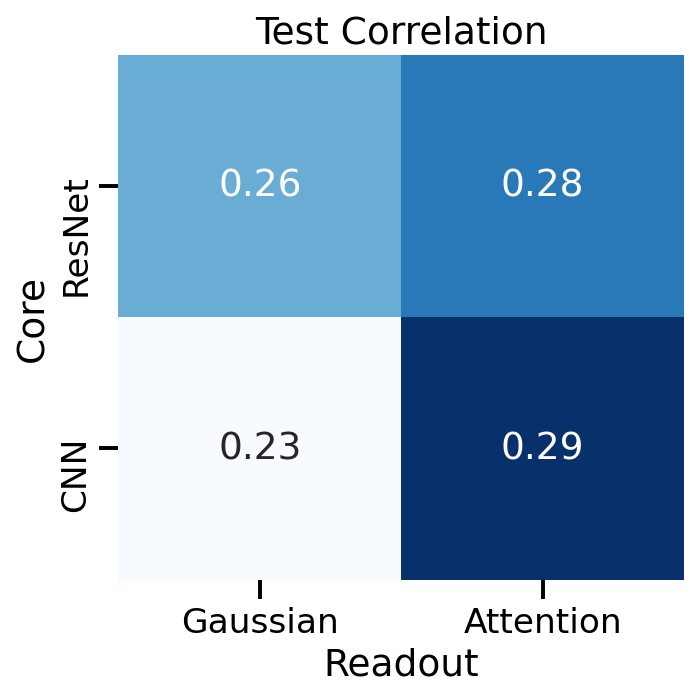

In [15]:
import seaborn as sns

plt.figure(figsize=(5, 5), dpi=150, facecolor='w')
sns.set_context('talk')
sns.heatmap(df.T, annot=True, cbar=False, cmap='Blues')

plt.ylabel('Core')
plt.xlabel('Readout')
plt.title('Test Correlation')

plt.tight_layout()

plt.savefig('ablation.png', dpi=150)